In [1]:
import os
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2022-03-04 12:54:01.451075: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-04 12:54:01.451099: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
CLASSES = ["Defective", "Non-Defective"]

DATA_DIR = Path("../data")
PREPROCESSED_DATA_SUBDIR = Path("Preprocessed Dataset")
TRAIN_SUBDIR = Path("Train")
TEST_SUBDIR = Path("Test")

In [3]:
train_filepaths_defective = [DATA_DIR / PREPROCESSED_DATA_SUBDIR / TRAIN_SUBDIR / CLASSES[0] / file for file in os.listdir(DATA_DIR / PREPROCESSED_DATA_SUBDIR / TRAIN_SUBDIR / CLASSES[0])]
train_filepaths_nondefective = [DATA_DIR / PREPROCESSED_DATA_SUBDIR / TRAIN_SUBDIR / CLASSES[1] / file for file in os.listdir(DATA_DIR / PREPROCESSED_DATA_SUBDIR / TRAIN_SUBDIR / CLASSES[1])]
test_filepaths_defective = [DATA_DIR / PREPROCESSED_DATA_SUBDIR / TRAIN_SUBDIR / CLASSES[0] / file for file in os.listdir(DATA_DIR / PREPROCESSED_DATA_SUBDIR / TRAIN_SUBDIR / CLASSES[0])]
test_filepaths_nondefective = [DATA_DIR / PREPROCESSED_DATA_SUBDIR / TRAIN_SUBDIR / CLASSES[1] / file for file in os.listdir(DATA_DIR / PREPROCESSED_DATA_SUBDIR / TRAIN_SUBDIR / CLASSES[1])]

In [4]:
train_defective_average_values = []

for file_path in train_filepaths_defective:
    image = cv2.imread(str(file_path), cv2.IMREAD_GRAYSCALE)
    average_pixel_value = np.average(image)
    train_defective_average_values.append(average_pixel_value)

In [5]:
train_nondefective_average_values = []

for file_path in train_filepaths_nondefective:
    image = cv2.imread(str(file_path), cv2.IMREAD_GRAYSCALE)
    average_pixel_value = np.average(image)
    train_nondefective_average_values.append(average_pixel_value)

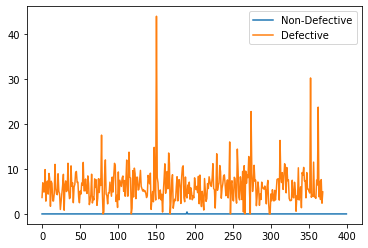

In [6]:
plt.plot(train_nondefective_average_values, label = "Non-Defective")
plt.plot(train_defective_average_values, label = "Defective")
plt.legend()

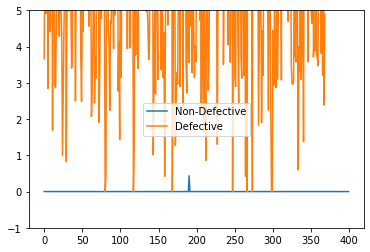

In [7]:
plt.ylim([-1, 5])
plt.plot(train_nondefective_average_values, label = "Non-Defective")
plt.plot(train_defective_average_values, label = "Defective")
plt.legend()

In [8]:
np.unique(train_nondefective_average_values)

array([0.       , 0.4355751])

In [9]:
def is_defective(image):
    average_pixel_value = np.average(image)
    is_defective = average_pixel_value > 0
    
    return is_defective

In [10]:
predictions_defective = []

for file_path in test_filepaths_defective:
    image = cv2.imread(str(file_path), cv2.IMREAD_GRAYSCALE)
    predictions_defective.append(is_defective(image))

In [11]:
predictions_nondefective = []

for file_path in test_filepaths_nondefective:
    image = cv2.imread(str(file_path), cv2.IMREAD_GRAYSCALE)
    predictions_nondefective.append(is_defective(image))

In [12]:
total_correct_predictions = predictions_defective.count(True) + predictions_nondefective.count(False)
test_dataset_size = len(predictions_defective) + len(predictions_nondefective)

In [13]:
accuracy = (total_correct_predictions/test_dataset_size * 100)

In [15]:
print(f"Test accuracy: {accuracy:.2f}%")

Test accuracy: 98.83%
